In [307]:
# Libraries
import sympy as sp 
from sympy import parse_expr
import numpy as np
import matplotlib.pyplot as plt
from math import tan, pi

# Soluciones Computacionales a Problemas de Ingeniería IST4360




*   Estudiantes: Julieth Mercado - Luis Marin
*   Código: 200158981 - 200097059



## Ejercicio 1
La función $f(x) = \tan (\pi x) -6$ tiene una raíz en $(1/\pi)\arctan (6)$. Escoja tres métodos de su preferencia, fije los valores iniciales a usar en cada uno y haga un máximo de 10 iteraciones. ¿Cuál de los métodos se desempeña mejor?¿Por qué?

In [308]:
x = parse_expr('x')
f = parse_expr("tan(pi * x) - 6")

i_max = 10

## Regular Falsi

In [309]:
def f_nr(x):
    return tan(pi*x)-6

def df_nr(x):
    return pi * (1 / np.cos(pi * x))**2

In [310]:
errores_newton = []

def metodo_newton_raphson(f, df, p_0, tol=10**-6, n=10):
    e_abs = 1
    i = 1
    while i <= n:
        
        if df(p_0) == 0:  # división por cero
            # print('Solución no encontrara - df(x)=0')
            return None
        
        p_1 = p_0 - (f(p_0))/(df(p_0))  # fórmula método
        e_abs = abs(p_1-p_0)
        errores_newton.append(e_abs)
        print('ite {:<2}: p_{:<2}={:.7f}, e_abs={:.7f}'.format(i,i,p_1,e_abs))
        
        if e_abs < tol: #criterio de parada
            print('Solución encotrada x={:.7f}, iteraciones: {}'.format(p_1,i))
            return p_1
        
        p_0 = p_1
        i += 1
    return None

In [311]:
p0 = 0.2
metodo_newton_raphson(f_nr, df_nr, p0)

ite 1 : p_1 =1.2986538, e_abs=1.0986538
ite 2 : p_2 =1.8144104, e_abs=0.5157565
ite 3 : p_3 =3.2916372, e_abs=1.4772268
ite 4 : p_4 =3.8458443, e_abs=0.5542071
ite 5 : p_5 =5.4728638, e_abs=1.6270195
ite 6 : p_6 =5.4597056, e_abs=0.0131582
ite 7 : p_7 =5.4502820, e_abs=0.0094236
ite 8 : p_8 =5.4475849, e_abs=0.0026972
ite 9 : p_9 =5.4474320, e_abs=0.0001529
ite 10: p_10=5.4474315, e_abs=0.0000004
Solución encotrada x=5.4474315, iteraciones: 10


5.4474315432924465

In [312]:
errores_newton

[1.0986538057482806,
 0.5157565478106381,
 1.4772268173972725,
 0.554207123113958,
 1.6270195179881588,
 0.01315819544127983,
 0.009423577558338003,
 0.0026971886824780356,
 0.0001528640414898419,
 4.4304227575509003e-07]

Text(0.5, 1.0, 'Errores Regular Falsi')

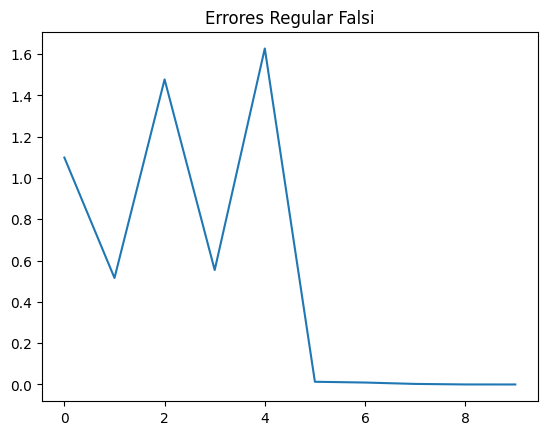

In [313]:
plt.plot(errores_newton)
plt.title("Errores Regular Falsi")

## Secante

In [314]:
a = 0.1
b = 0.2

i = 0 
error_secante = []

for i in range(i_max): 
    punto_siguiente = b - f.subs(x, b).evalf() * (b - a) / (f.subs(x, b).evalf() - f.subs(x, a).evalf())
    a, b = b, punto_siguiente
    error_a = np.abs((punto_siguiente-a)/punto_siguiente)
    error_secante.append(error_a)
    i = i + 1

b

-104.587195159176

In [315]:
error_secante

[0.867815549710314,
 21.0253526125026,
 0.844530080576496,
 13.6136558212816,
 0.778119193851491,
 0.896336841547884,
 1.48626355228296,
 1.30615588936624,
 0.492201749550339,
 1.21186239589106]

Text(0.5, 1.0, 'Errores Secante')

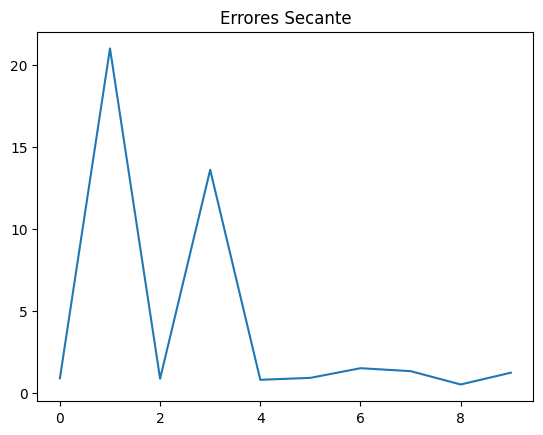

In [316]:
plt.plot(error_secante)
plt.title("Errores Secante")

## Bisección

In [317]:
a = 0
b = 0.5
i = 0

errores_biseccion = []
valor_c = []
c_ant = 0

while i < i_max:
    # Find middle point
    c = (a+b)/2
    valor_c.append(c)
    # Check if middle point is root
    if (f.subs(x, c).evalf() == 0.0):
        break
    # Decide the side to repeat the steps
    elif (f.subs(x, c).evalf()*f.subs(x, a).evalf() < 0):
        b = c
    else:
        a = c
    error_a = np.abs((c - c_ant)/c)
    errores_biseccion.append(error_a)
    c_ant = c
    i = i + 1

print(f"La solución es: {c}")

La solución es: 0.44775390625


In [318]:
errores_biseccion

[1.0,
 0.3333333333333333,
 0.14285714285714285,
 0.06666666666666667,
 0.034482758620689655,
 0.017543859649122806,
 0.008695652173913044,
 0.004366812227074236,
 0.002178649237472767,
 0.0010905125408942203]

Text(0.5, 1.0, 'Errores Bisección')

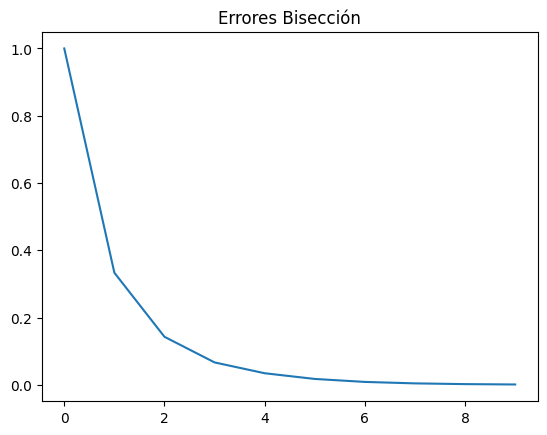

In [319]:
plt.plot(errores_biseccion)
plt.title("Errores Bisección")

## Analisis

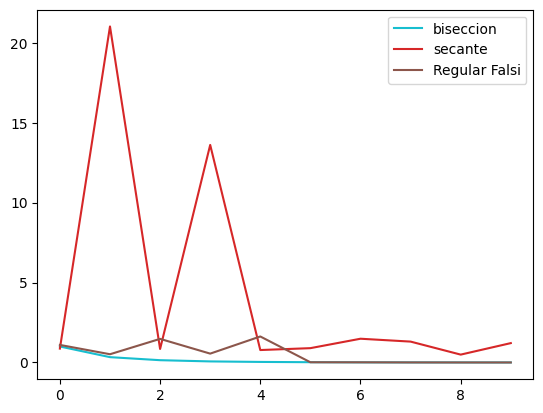

In [320]:
plt.plot(errores_biseccion, label='biseccion', color='C9')
plt.plot(error_secante, label='secante', color='C3')
plt.plot(errores_newton, label='Regular Falsi', color='C5')
plt.legend()

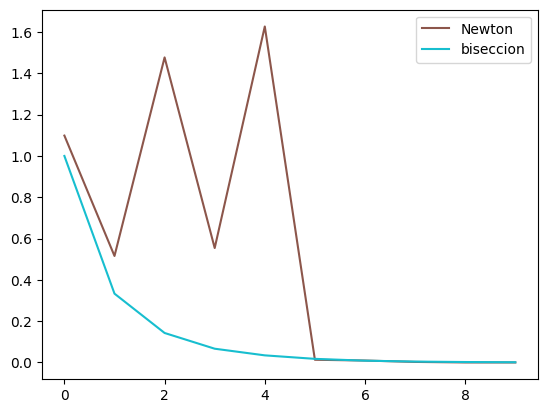

In [327]:
plt.plot(errores_newton, label='Newton', color='C5')
plt.plot(errores_biseccion, label='biseccion', color='C9')
plt.legend()

R/ Biseccion

## Ejercicio 2
La probabilidad de que en un juego de Racquetball (con dos jugadores A y B) el jugador A gane con un puntaje 21-0 viene dada por la expresión:
$$P=\frac{1+p}{2}\left(\frac{p}{1-p+p^2}\right)^{21},$$
donde $p$ denota la probabilidad de que el jugador A gane cualquier juego (indenpendiente del saque). Determine con una tolerancia de $10^{-3}$ el mínimo valor de $p$ tal que A ganará en al menos la mitad de los juegos con B.

El -0.5 en la función f(p) se utiliza para representar la diferencia entre la probabilidad dada por la expresión en el problema y el valor objetivo de $0.5$. La función f(p) se define como:

def f(p):
    return (1 + p) / 2 * (p / (1 - p + p ** 2)) ** 21 - 0.5
Esta función toma como entrada un valor de $p$ y devuelve el valor de la expresión dada en el problema menos $0.5$. Cuando esta función se iguala a cero y se resuelve para $p$, se encuentra el valor mínimo de $p$ que satisface la ecuación $P \geq 0.5$, donde $P$ está dado por la expresión en el problema.

En otras palabras, estamos buscando el valor mínimo de $p$ tal que $(1 + p) / 2 * (p / (1 - p + p ** 2)) ** 21 \geq 0.5$. Si restamos $0.5$ a ambos lados de esta desigualdad, obtenemos $(1 + p) / 2 * (p / (1 - p + p ** 2)) ** 21 - 0.5 \geq 0$. Entonces, podemos definir una función f(p) que representa el lado izquierdo de esta desigualdad y encontrar una raíz de esta función utilizando un método numérico como el método de Newton-Raphson.

In [322]:
import numpy as np

def my_bisection(f, a, b, tol): 

    # check if a and b bound a root
    if np.sign(f(a)) == np.sign(f(b)):
        raise Exception("The scalars a and b do not bound a root")

    # get midpoint
    m = (a + b)/2
    
    if np.abs(f(m)) < tol:
        # stopping condition, report m as root
        return m

    elif np.sign(f(a)) == np.sign(f(m)):
        # case where m is an improvement on a. 
        # Make recursive call with a = m
        return my_bisection(f, m, b, tol)
    
    elif np.sign(f(b)) == np.sign(f(m)):
        # case where m is an improvement on b. 
        # Make recursive call with b = m
        return my_bisection(f, a, m, tol)

In [323]:
f = lambda x:(1 + x) / 2 * (x / (1 - x + x ** 2)) ** 21 - 0.5
my_bisection(f, 0, 1, 1e-3)

0.84228515625

## Ejercicio 3
La función $f(x) = 4x^2-e^{x}-e^{-x}$ tiene dos raíces positivas $x_{1},\, x_{2}$, use el método de Newton para aproximar estos valores con una tolerancia de $10^{-6}$.

In [324]:
from math import exp

def f(x):
    return 4*x**2 - exp(x) - exp(-x)

def df(x):
    return 8*x - exp(x) + exp(-x)

def newton(f, df, x0, tol):
    while abs(f(x0)) > tol:
        x0 = x0 - f(x0)/df(x0)
    return x0

root1 = newton(f, df, 1.5, 1e-6)
root2 = newton(f, df, 3.5, 1e-6)

In [325]:
root1

0.8244985856805488

In [326]:
root2

4.3062452735723005